# Random Forest Training for QSO targets selection

**Author:** Edmond Chaussidon (CEA Saclay) (edmond.chaussidon@cea.fr)

This notebook explains how the random forest files (for the targets selection) are generated. To have a brief overview of the QSO targets selection and an interpretability of this selection, see `qso-dr8.ipynb` notebook written for DR8s release (however no major changes are expected with DR9 !)

All the file are written and saved in NERSC : `/global/cfs/cdirs/desi/target/analysis/RF`

**/!\** **WARNING** This notebook had generated files in NERSC !! **PLEASE** change path and savename to don't overwritte data or be sure to keep alive the current files. **/!\**

The training is divided in three parts :
    
    * 1) data_collection : collect data from dr9
    * 2) data_preparation : build atributes for RF
    * 3) train_test_RF : training and some tests

**Remark :** The first part is time consumming and already saved in : `/global/cfs/cdirs/desi/target/analysis/RF/``


In [1]:
DIR = '/global/cfs/cdirs/desi/target/analysis/RF/'

In [2]:
from pathlib import Path
path_train = f'{Path().absolute()}/../../py/desitarget/train/'

-------
## 1.1)  data_collection

**WARNING:** This part is time consuming...

**REMARK:** Not necessary to run this section for the training if the files are existing in DIR **/!\** 

In [3]:
from desitarget.train.data_collection.sweep_meta import sweep_meta

sweep_meta('dr9s', f'{DIR}dr9s_sweep_meta.fits')
sweep_meta('dr9n', f'{DIR}dr9n_sweep_meta.fits')

* Add your version of topcat in my_tractor_extract_batch.py :

    `STILTSCMD = 'java -jar -Xmx4096M /global/homes/e/edmondc/Software/topcat/topcat-full.jar -stilts'`
    
* If you want a version of topcat go [here](`http://www.star.bris.ac.uk/~mbt/topcat/`).


In [4]:
#from desitarget.train.data_collection.my_tractor_extract_batch import my_tractor_extract_batch

#collect QSO sample
#my_tractor_extract_batch(16, f'{DIR}QSO_DR9s_sdss.fits', 'dr9s', '0,360,-10,30', 'qso', path_train, DIR)

In [5]:
#collect stars sample
#my_tractor_extract_batch(4, f'{DIR}STARS_DR9s.fits', 'dr9s', '320,340,-1.25,1.25', 'stars', path_train, DIR)

In [6]:
#collect test sample 
#my_tractor_extract_batch(4, f'{DIR}TEST_DR9s.fits', 'dr9s', '30,45,-5,5', 'test', path_train, DIR)

## 1.2) Add QSOs from VI

In [3]:
from desitarget.train.data_collection.QSOs_from_VI import extract_qsos_from_vi, sdss_vi_merger

vi_catalog_path = '/global/u2/e/edmondc/Scratch/SHARE/qso_deep_december_blanc.fits'
output_path = f'{DIR}QSO_DR9s_VI.fits'

extract_qsos_from_vi(vi_catalog_path, output_path)

(2,)

[SWEEP] :  ['030', 'm', '010', '040', 'm', '005']
    * Number of objetcs in this sweep in catalog :  130
    * Number of objetcs selected in the sweep file :  130
(132,)

[SWEEP] :  ['030', 'm', '005', '040', 'p', '000']
    * Number of objetcs in this sweep in catalog :  264
    * Number of objetcs selected in the sweep file :  264
(396,)

[SWEEP] :  ['150', 'p', '030', '160', 'p', '035']
    * Number of objetcs in this sweep in catalog :  363
    * Number of objetcs selected in the sweep file :  337
(733,)

[SWEEP] :  ['140', 'p', '000', '150', 'p', '005']
    * Number of objetcs in this sweep in catalog :  170
    * Number of objetcs selected in the sweep file :  170
(903,)

[SWEEP] :  ['150', 'p', '000', '160', 'p', '005']
    * Number of objetcs in this sweep in catalog :  209
    * Number of objetcs selected in the sweep file :  209
(1112,)
(1110,)
(2,)

[SWEEP] :  ['100', 'p', '050', '110', 'p', '055']
    * Number of objetcs in this sweep in catalog :  35
    * Number of

In [3]:
from desitarget.train.data_collection.QSOs_from_VI import sdss_vi_merger

file_sdss = f'{DIR}QSO_DR9s_SDSS.fits'
file_VI = f'{DIR}QSO_DR9s_VI.fits'

output = f'{DIR}QSO_DR9s.fits'

sdss_vi_merger(file_sdss, file_VI, output)

Nbr QSOs from SDSS : 382256
Nbr QSOs frim VI : 1843
Nbr QSOs for training : 384099


--------
## 2) data_preparation 

**Remark :** We remove test region from training data in *data_preparation/Code/make_training_samples.py* (it is **hard coding**)  for the region 30<RA<45 & -5<DEC<5. 

**/!\** **Take CARE** if you don't use this region for the test_sample **/!\**

In [ ]:
#range in r mag for the training and test sample : 17.5 <--> max_rmag
max_rmag = 23.0

In [5]:
from desitarget.train.data_preparation.make_training_samples import make_training_samples

make_training_samples(f'{DIR}QSO_DR9s.fits', f'{DIR}STARS_DR9s.fits', f'{DIR}QSO_TrainingSample_DR9s.fits', f'{DIR}STARS_TrainingSample_DR9s.fits', max_rmag=max_rmag)

n_STARS initial : 3153782
[INFO] shift photometry for 0 objects
[WARNING] REMOVE FROM THE STARS TRAINING maskbits 1, 5, 6, 7, 10, 12, 13 (IF YOU WANT TO ADD/REMOVE MORE MASKBITS GO HERE)
[INFO] Removing test region...
n_STARS after selection/before normalization : 442461

n_QSO initial : 384099
[INFO] shift photometry for 733 objects
[WARNING] REMOVE FROM THE QSO TRAINING maskbits 1, 5, 6, 7, 10, 12, 13 (IF YOU WANT TO ADD/REMOVE MORE MASKBITS GO HERE)
[INFO] Removing test region...
n_QSO selected in FatStripe82 : 53930
n_QSO selected outside FatStripe82 : 176221
n_QSO after selection : 230151

╔STARS/QSO TABLE══╦═══════════════╦═══════════════════╦═════════════╦══════════════╗
║ m_rmag ║ M_rmag ║ n_STARS_drmag ║ n_sel_STARS_drmag ║ n_QSO_drmag ║ nw_QSO_drmag ║
╠════════╬════════╬═══════════════╬═══════════════════╬═════════════╬══════════════╣
║  17.5  ║  17.7  ║      8122     ║        1118       ║     1118    ║     244      ║
╠════════╬════════╬═══════════════╬═══════════════════╬═══

In [8]:
from desitarget.train.data_preparation.make_test_sample import make_test_sample

make_test_sample(f'{DIR}TEST_DR9s.fits', f'{DIR}TestSample_DR9s.fits', max_rmag=max_rmag)

MASKBIT USED : 1, 5, 6, 7, 10, 12, 13 
n_OBJ avant selection : 20035708
n_QSO avant selection : 18760
Selection finie
min_ra : 30 deg, max_ra : 45 deg
min_dec : -5 deg, max_dec : 5 deg
skyArea : 150 deg2
n_OBJ : 3135690
n_QSO : 18399
Save : /global/cfs/cdirs/desi/target/analysis/RF/TestSample_DR9s.fits


------
## 3) train_test_RF


In [9]:
#Pipeline Congifuration (to generate RF with different hyperparameters)
from desitarget.train.train_test_RF.PipelineConfigScript import PipelineConfigScript

fpn_STARS_TrainingSample = f"{DIR}STARS_TrainingSample_DR9s.fits"
fpn_QSO_TrainingSample = f"{DIR}QSO_TrainingSample_DR9s.fits"
fpn_TestSample = f"{DIR}TestSample_DR9s.fits"
fpn_QLF = f"{path_train}data_preparation/ROSS4_tabR"
fpn_config = f"{DIR}config.npz"

PipelineConfigScript(fpn_QSO_TrainingSample, fpn_STARS_TrainingSample, fpn_TestSample, fpn_QLF, fpn_config, max_rmag=max_rmag)


///**********TS CONFIG SCRIPT**********///
Save : /global/cfs/cdirs/desi/target/analysis/RF/config.npz


In [10]:
#Random Forest training
from desitarget.train.train_test_RF.train_RF import train_RF

#RF all-z training
train_RF(f'{DIR}config.npz', 'DR9s_LOW', f'{DIR}RFmodel/DR9s_LOW')


///**********TRAIN RF**********///
INFO::TRAIN RF: RELEASE : ( 'DR9s' )
INFO::TRAIN RF: BANDS : ( 'grzW' )
INFO::TRAIN RF: MODEL : ( 'DR9s_LOW' )
INFO::TRAIN RF: HYPERPARAMETERS SPACE :
OrderedDict([('RF:maxDepth',
              [25]),
             ('RF:maxLNodes',
              [850]),
             ('RF:min_zred',
              [[0.0,
                6.0]]),
             ('RF:nTrees',
              [500])])
INFO::TRAIN RF: hyParamSpaceSize : ( 1 )
INFO::TRAIN RF: hyParamSpaceShape : ( [1, 1, 1, 1] )

INFO::TRAIN RF: feature_names : ( ['g_r', 'r_z', 'g_z', 'g_W1', 'r_W1', 'z_W1', 'g_W2', 'r_W2', 'z_W2', 'W1_W2', 'r'] )
INFO::TRAIN RF: n_features : ( 11 )
INFO::TRAIN RF: n_jobs : ( 20 )

INFO::TRAIN RF: STARS Training Sample : ( '/global/cfs/cdirs/desi/target/analysis/RF/STARS_TrainingSample_DR9s.fits' )
INFO::TRAIN RF: n_STARS : ( 214342 )
INFO::TRAIN RF: QSO Training Sample : ( '/global/cfs/cdirs/desi/target/analysis/RF/QSO_TrainingSample_DR9s.fits' )
INFO::TRAIN RF: n_QSO ( 229752 )

In [11]:
#RF Highz training
train_RF(f'{DIR}config.npz', 'DR9s_HighZ', f'{DIR}RFmodel/DR9s_HighZ')


///**********TRAIN RF**********///
INFO::TRAIN RF: RELEASE : ( 'DR9s' )
INFO::TRAIN RF: BANDS : ( 'grzWHighz' )
INFO::TRAIN RF: MODEL : ( 'DR9s_HighZ' )
INFO::TRAIN RF: HYPERPARAMETERS SPACE :
OrderedDict([('RF:maxDepth',
              [25]),
             ('RF:maxLNodes',
              [850]),
             ('RF:min_zred',
              [[3.2,
                6.0]]),
             ('RF:nTrees',
              [500])])
INFO::TRAIN RF: hyParamSpaceSize : ( 1 )
INFO::TRAIN RF: hyParamSpaceShape : ( [1, 1, 1, 1] )

INFO::TRAIN RF: feature_names : ( ['g_r', 'r_z', 'g_z', 'g_W1', 'r_W1', 'z_W1', 'g_W2', 'r_W2', 'z_W2', 'W1_W2', 'r'] )
INFO::TRAIN RF: n_features : ( 11 )
INFO::TRAIN RF: n_jobs : ( 20 )

INFO::TRAIN RF: STARS Training Sample : ( '/global/cfs/cdirs/desi/target/analysis/RF/STARS_TrainingSample_DR9s.fits' )
INFO::TRAIN RF: n_STARS : ( 214342 )
INFO::TRAIN RF: QSO Training Sample : ( '/global/cfs/cdirs/desi/target/analysis/RF/QSO_TrainingSample_DR9s.fits' )
INFO::TRAIN RF: n_QSO ( 2

In [12]:
#Sklearn to desitarget format
from desitarget.train.train_test_RF.Convert_to_DESI_RF import convert_and_save_to_desi 

RF_filename_input = f"{DIR}RFmodel/DR9s_LOW/model_DR9s_LOW_z[0.0, 6.0]_MDepth25_MLNodes850_nTrees500.pkl.gz"
RF_filename_output = f"{DIR}RFmodel_desitarget/rf_model_dr9.npz"
convert_and_save_to_desi(RF_filename_input, RF_filename_output)

RF_HighZ_filename_input = f"{DIR}RFmodel/DR9s_HighZ/model_DR9s_HighZ_z[3.2, 6.0]_MDepth25_MLNodes850_nTrees500.pkl.gz"
RF_HighZ_filename_output = f"{DIR}RFmodel_desitarget/rf_model_dr9_HighZ.npz"
convert_and_save_to_desi(RF_HighZ_filename_input, RF_HighZ_filename_output)

Starting convertion...
File load :  /global/cfs/cdirs/desi/target/analysis/RF/RFmodel/DR9s_LOW/model_DR9s_LOW_z[0.0, 6.0]_MDepth25_MLNodes850_nTrees500.pkl.gz
RandomForestClassifier(max_depth=25, max_leaf_nodes=850, n_estimators=500,
                       n_jobs=20) 

Desi format is saved at :  /global/cfs/cdirs/desi/target/analysis/RF/RFmodel_desitarget/rf_model_dr9.npz 

Starting convertion...
File load :  /global/cfs/cdirs/desi/target/analysis/RF/RFmodel/DR9s_HighZ/model_DR9s_HighZ_z[3.2, 6.0]_MDepth25_MLNodes850_nTrees500.pkl.gz
RandomForestClassifier(max_depth=25, max_leaf_nodes=850, n_estimators=500,
                       n_jobs=20) 

Desi format is saved at :  /global/cfs/cdirs/desi/target/analysis/RF/RFmodel_desitarget/rf_model_dr9_HighZ.npz 



------------
## 4) Some tests


############################################
Input file =  /global/cfs/cdirs/desi/target/analysis/RF/TestSample_DR9s.fits
Original size :  3135690
Reduce size   :  535391
############################################

Load Random Forest : 
    * /global/cfs/cdirs/desi/target/analysis/RF/RFmodel/DR9s_LOW/model_DR9s_LOW_z[0.0, 6.0]_MDepth25_MLNodes850_nTrees500.pkl.gz
    * /global/cfs/cdirs/desi/target/analysis/RF/RFmodel/DR9s_HighZ/model_DR9s_HighZ_z[3.2, 6.0]_MDepth25_MLNodes850_nTrees500.pkl.gz
Random Forest over :  535391  objects

############################################
R magnitude Elements from Test Sample : 
R_mag max =  22.99998664855957  -- R_mag min =  17.5000057220459
R_mag max selected =  22.7  -- R_mag min selected =  17.0
############################################

############################################
Geomeric Elements from Test Sample : 
RA max =  44.9999947554622  -- RA min =  30.000014361134387
DEC max =  4.999982968350073  -- DEC min =  -4.99999399825979

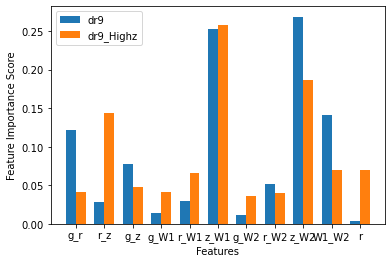

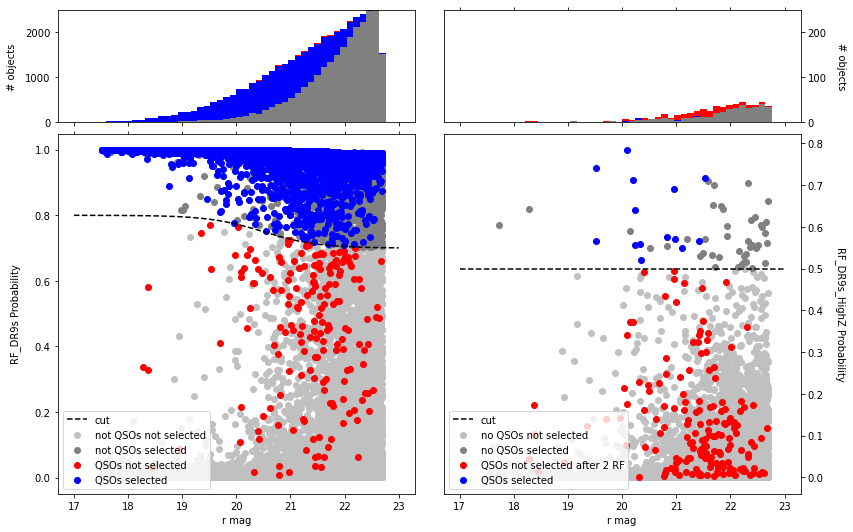

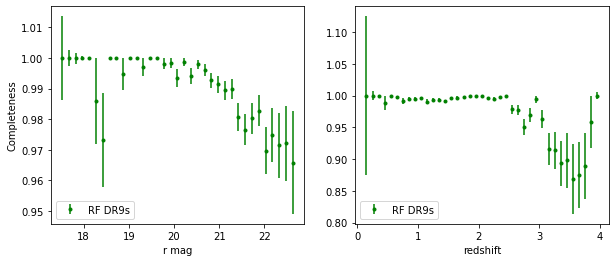

In [13]:
from desitarget.train.train_test_RF.Some_tests import make_some_tests_and_plots

inputFile = f'{DIR}TestSample_DR9s.fits'
RF_file = f'{DIR}RFmodel/DR9s_LOW/model_DR9s_LOW_z[0.0, 6.0]_MDepth25_MLNodes850_nTrees500.pkl.gz'
RF_Highz_file = f'{DIR}RFmodel/DR9s_HighZ/model_DR9s_HighZ_z[3.2, 6.0]_MDepth25_MLNodes850_nTrees500.pkl.gz'

make_some_tests_and_plots(inputFile, RF_file, RF_Highz_file)